# Assignment 2

Gómez Laura, 2050216

Ciobotaru Laurențiu-Cristian, 2045749

### Question 1: Infinite horizon dynamic programming - Harold Zurcher's problem

In this question, rather than considering John Rust's problem, we consider Harold Zurcher's problem. That is, we consider a regenerative optimal stopping problem of repeatedly choosing whether to replace a bus engine or not. We model this as an infinite horizon dynamic programming problem. The problem is a simplified and discretized version of the theoretical model presented in section 3 of Rust (1987).

Formally, every period Harold chooses to either renew ($A=1$) or not renew ($A=0$) the bus engine based on the cumulative mileage $X$ on the bus since the last renewal (in this assignment, there are no utility shocks $\varepsilon$). Mileage $X$ is measured in tens of thousands of miles and takes values in $\{0, 1,2,...,20\}$. Mileage $X'$ following the continued use of an engine ($A=0$) equals the previous mileage $X$ plus an independent draw from a geometric distribution with parameter $0<k<1$ capped at $20-X$. Similarly, mileage $X'$ following renewal ($A=1$) equals an independent draw from a geometric distribition with parameter $0<k<1$ capped at $20$. More precisely, given mileage $X$ and choice $a$, the probability of observing $X'=x'$ equals

$$
q(x'| a,X) = \begin{cases}
k(1-k)^{x'- (1-a)X}&\text{if $(1-a)X\leq x'<20$ }\\
(1-k)^{20-(1-a)X} &\text{if $x'=20$ } \\
0 &\text{otherwise.}
\end{cases}
$$

Note that $q(\cdot|1,X)=q(\cdot|0,0)$, so that it suffices to specify $q(\cdot|0,X)$ (below, we will ask you to encode it in a $21\times 21$ Markov transition matrix $\Pi$).

Harold's flow utility from choice $a$ at mileage $X$ is given by

$$
u(a, X) = -[X(1-a)]^2 - \delta a.
$$


** a) Write Harold's Bellman equation. **

$U(a,X)$ =$u(a,X) +ρ∫max_{a′=0,1}[U(a′,x′)dQ(x′|a,X)$

$U(a,X)$ =-$-[X(1-a)]^2$ - $\delta a$+$ρ$∫$max_{a′=0,1}${{$Pr_{a=0}$$[-[X]^2]$},[${Pr_{a=1}[{-\delta}]}]$|a,X}

$U(a,X)$ =$-[X(1-a)]^2$ - $\delta a$+$ρ∫max_{a′=0,1}{{k(1-k)^{x'-X}}[-[X]^2]}$,${(1−𝑘)^{20}[{-\delta}]}$|a,X}

For the rest of this question, use Matlab and the parameters 
- $\delta = 500$,
- $\rho = 0.95$, and
- $k = 0.5$.

** b) Code up a $21\times 21$ transition matrix $\Pi$ with $(i,j)$th entry equal to $q(j-1|0,i-1)$.**

In [65]:
clear all
delta = 500;
rho = 0.95; 
k = 0.5;
a = 0;
B = zeros(21)
for i = 0:20
    for j = 0:20
        if (1-a)*i <= j && (1-a)*i< 20 
            r = k*(1-k)^(j-(1-a)*i)
        elseif j == 20
            r = (1-k)^(20-(1-a)*i)
        else 
            r = 0
        end
    B(i+1,j+1) = r
    end            
end
B


B =

     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   

** c) Numerically solve Harold's decision problem using value function iteration. **


bellman =

  function_handle with value:

    @(v)(max([u(0,suppX)+rho*(B*v)';u(1,suppX)+rho*(B(1,:)*v*(ones(21,1)))'])')


ans =

    19




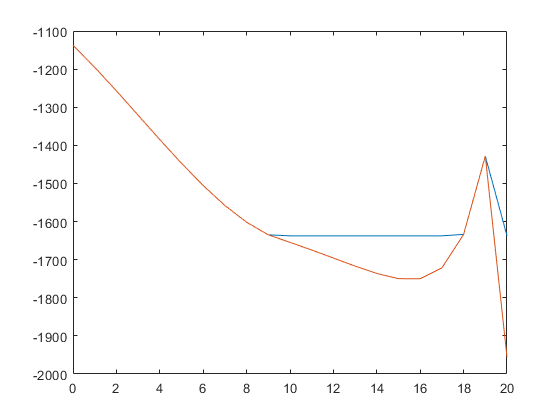

In [66]:
% Bellman operator
boundX = [0 20];
nSuppX = 21;
suppX = boundX(1):(boundX(2)-boundX(1))/(nSuppX-1):boundX(2);
u=@(a,X)((-(X*(1-a)).^2-delta*a));
bellman=@(v)(max([u(0,suppX)+rho*(B*v)';u(1,suppX)+rho*(B(1,:)*v*(ones(21,1)))'])')

% Solve by value function iteration
v=0; vOld=1; dist = [];
while max(max(abs(v-vOld)))>1E-9
    vOld = v;
    v = bellman(vOld);
    dist = [dist;max(max(abs(v-vOld)))];
end
plot(1:size(dist,1),dist)
uj=u(0,suppX)'+rho*(B*v);
plot(suppX,[v uj])
max(suppX(find(uj>min(v))))


### Question 2: Numerical Tolerances in Nested Fixed-Point Estimation 

** a) Solve Computational Exercise 2 from Abbring and Klein (2015; see http://ddc.abbring.org).** 

Some directions:

- Systematically explore all combinations of a few inner loop and a few outer loop tolerances, making sure to include both cases in which a smaller tolerance and cases in which a larger tolerance is used in the inner loop.
- For each combination of tolerances, evaluate the procedure's performance using a Monte Carlo exercise (as in Computational Exercise 1).
- For the sake of replicability, make sure to set the seed of the random number generator used. For the sake of comparability, use the same simulated data across different combinations of tolerances (or, equivalently, set the same seed for each combination of tolerances). 

You will likely find that, in some contrast to Dubé, Fox, and Su (2012), the nested fixed-point procedure still works well in this case even if the fixed point is computed with relatively low precision in the inner loop. 

** b) Bonus question: Can you tweak the nested fixed-point procedure as it has been coded up so that low precision in the inner loop causes trouble?** 

Hints will be given in class once you have made some progress on Question 2a. 

### Tolerance levels and Monte Carlo Simulations

Following  the work of  Dubé et. al (2012),  different combinations of tolerance for the inner and outer loop will be chosen: one where both are loose, one where both are tight and one where we have a tight outer loop but a loose inner loop or vice versa. Regarding the stopping criteria, following the guidelines of the MATLAB optimization options, "The number of iterations in an optimization depends on the stopping criteria for the solver.... Generally, a tolerance is a threshold which, if crossed, stops the iterations of a solver". As indicated in the description of the exercise, it is advised to make use of TolX (The termination tolerance for x) and TolFun (The termination tolerance for the function value).  
According to the authors, the ideal TolFun is 1e-02 and the ideal TolFixedPoint is between 1e-08 and 1e-14. It could  also be above these values.  
Thus, we tried some iterations with different values acording to Dubé, Fox, and Su (2012). Next step  was to perform a Monte Carlo Simulation:

In [72]:
%when we run this code we see that even if we change the innerloop tolerance  the estimated value does not change so much in compare with
%the true value. In this case we choose different combination of the values and it still converges. We choose 10 periods 
%to make the procedure faster. 

tolFixedPoint= [10^(-2), 10^(-8), 10^(-14)];
TolFun=[10^(-1), 10^(-2), 10^(-6)];
TolX=[10^(-8), 10^(-4), 10^(-8)];


nPeriods = 10
nFirms = 1000
nSuppX = 5;
supportX = (1:nSuppX)'
capPi = 1./(1+abs(ones(nSuppX,1)*(1:nSuppX)-(1:nSuppX)'*ones(1,nSuppX)));
capPi = capPi./(sum(capPi')'*ones(1,nSuppX))
beta = [-0.1*nSuppX;0.2]
delta = [0;1]
rho = 0.95
[u0,u1] = flowpayoffs(supportX,beta,delta);

number_simulations= 10;
deltaU_storage = zeros(number_simulations,nSuppX,2,1,3);
simulateData_storage = zeros(number_simulations,nPeriods,nFirms,2,3);

results= zeros(number_simulations,3,3,3);

rng(123); 

for sim=1:number_simulations

    for i=1:size(tolFixedPoint,2)

    [capU0,capU1] = fixedPoint(u0,u1,capPi,rho,tolFixedPoint(i),@bellman,[],[]);
    deltaU = capU1-capU0;
    [choices,iX] = simulateData(deltaU,capPi,nPeriods,nFirms);
    for row=1:nSuppX
        for col=[1,2]
        deltaU_storage(row,col,1,i)=deltaU(row,col);
        end
    end
    
    for t=1:nPeriods
        for n=1:nFirms
        simulateData_storage(t,n,1,i)=choices(t,n);
        simulateData_storage(t,n,2,i)=iX(t,n);
        end
    end

    %Next,the outer loop for different combinations of tolerance levels; start by using the objective function as defined in the DDC package
    for j=1:size(TolFun,2)
    
        objectiveFunction = @(parameters)negLogLik(simulateData_storage(:,:,1,i),simulateData_storage(:,:,2,i),supportX,capPi,parameters(1:2),[delta(1);parameters(3)],...
                                           rho,@flowpayoffs,@bellman,@fixedPoint,tolFixedPoint(i));
        startvalues = [-1;-0.1;0.5];

        lowerBounds = -Inf*ones(size(startvalues));
        lowerBounds(3) = 0;
    

        OptimizerOptions = optimset('Display','iter','Algorithm','interior-point','AlwaysHonorConstraints','bounds',...
                            'GradObj','on','TolFun',TolFun(j),'TolX',TolX(j),'DerivativeCheck','off','TypicalX',[beta;delta(2)]);
        [results(sim,i,j,:),~,exitflag] = fmincon(objectiveFunction,startvalues,[],[],[],[],lowerBounds,[],[],OptimizerOptions);
        
        
        [~,~,informationMatrix] = objectiveFunction(reshape(results(sim,i,j,:),[3,1]));
        standardErrors(sim,i,j,:)=diag(sqrt(inv(informationMatrix)));
        
        end
    end
end    






nPeriods =

    10


nFirms =

        1000


supportX =

     1
     2
     3
     4
     5


capPi =

    0.4380    0.2190    0.1460    0.1095    0.0876
    0.1935    0.3871    0.1935    0.1290    0.0968
    0.1250    0.1875    0.3750    0.1875    0.1250
    0.0968    0.1290    0.1935    0.3871    0.1935
    0.0876    0.1095    0.1460    0.2190    0.4380


beta =

   -0.5000
    0.2000


delta =

     0
     1


rho =

    0.9500

                                            First-order      Norm of
 Iter F-count            f(x)  Feasibility   optimality         step
    0       1    9.480688e+03    0.000e+00    1.168e+04
> In negLogLik (line 131)
  In @(parameters)negLogLik(simulateData_storage(:,:,1,i),simulateData_storage(:,:,2,i),supportX,capPi,parameters(1:2),[delta(1);parameters(3)],rho,@flowpayoffs,@bellman,@fixedPoint,tolFixedPoint(i))
  In barrier
  In fmincon (line 824)

> In negLogLik (line 131)
  In @(parameters)negLogLik(simulateData_storage(:,:,1,i),simulateData_storage

In [73]:
m=mean(results)


m(:,:,1,1) =

   -0.5021   -0.4833   -0.4698


m(:,:,2,1) =

   -0.5021   -0.4833   -0.4698


m(:,:,3,1) =

   -0.5021   -0.4833   -0.4698


m(:,:,1,2) =

    0.2007    0.1954    0.1925


m(:,:,2,2) =

    0.2007    0.1954    0.1925


m(:,:,3,2) =

    0.2007    0.1954    0.1925


m(:,:,1,3) =

    1.0035    1.0096    1.0038


m(:,:,2,3) =

    1.0034    1.0094    1.0037


m(:,:,3,3) =

    1.0034    1.0094    1.0036




In [74]:
se=mean(standardErrors)


se(:,:,1,1) =

    0.0447    0.0446    0.0446


se(:,:,2,1) =

    0.0447    0.0446    0.0446


se(:,:,3,1) =

    0.0447    0.0446    0.0446


se(:,:,1,2) =

    0.0139    0.0139    0.0139


se(:,:,2,2) =

    0.0139    0.0139    0.0139


se(:,:,3,2) =

    0.0139    0.0139    0.0139


se(:,:,1,3) =

    0.0420    0.0420    0.0420


se(:,:,2,3) =

    0.0420    0.0420    0.0420


se(:,:,3,3) =

    0.0420    0.0420    0.0420




From the above simulation and the obtained results we can see that the nested fixed value/ point procedure still works even in the case when the fixed point is computed with relativey low precision in the inner loop compared with  the outer loop. 

b. BONUS: The inner loop cannot cause troubles (at least not in the sense described in the exercise). One possible reason for this comes from the structure of CapU0 and CapU1 which are defined as a weighted sum of the inputs elements of their function. From this structure, it is possible to see that DeltaU is not affected by the inner loop tolerance level. As CapU0 and CapU1 move towards the fixed point, they are at a constant distance one from another, meaning that DeltaU is also constant, regardless of the inner loops's precision or when the iteration process stops. Thus, DeltaU is not sensitive to the inner loops'tolerance level, thus it does not propagate noise from the inner loop to the outer loop.

### References

Abbring, Jaap H., and Tobias J. Klein (2015). Dynamic discrete choice models: Methods, Matlab code, and Exercises. CentER, Department of Econometrics & OR, Tilburg University. http://ddc.abbring.org.

Dubé, Jean-Pierre, Jeremy T. Fox, and Che-Lin Su (2012). Improving the numerical performance of static and dynamic aggregate discrete choice random coefficients demand estimation. *Econometrica* 80, 2231-2267.

Rust, John (1987). Optimal replacement of GMC bus engines: An empirical model of Harold Zurcher. *Econometrica* 55, 999-1033.